In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import ZeroPadding2D, Conv2D, BatchNormalization, \
	ReLU, DepthwiseConv2D, Add, GlobalAveragePooling2D, Dense

In [8]:
layers = []

input_1 = tf.keras.Input(shape=(228,228,3))
layers.append(input_1)
Conv1_pad = ZeroPadding2D(padding=((0,1),(0,1)), data_format='channels_last')(input_1)
layers.append(Conv1_pad)
Conv1 = Conv2D(filters=32,
kernel_size=(3,3),
strides=(2,2),
data_format='channels_last',
activation='linear',
use_bias=False)(Conv1_pad)
layers.append(Conv1)	
bn_Conv1 = BatchNormalization(axis=3,momentum=0.999)(Conv1)
layers.append(bn_Conv1)
Conv1_relu = ReLU(max_value=6)(bn_Conv1)
layers.append(Conv1_relu)
expanded_conv_depthwise = DepthwiseConv2D(kernel_size=(3,3),
padding='same',
data_format='channels_last',
activation='linear',
use_bias=False)(Conv1_relu)
layers.append(expanded_conv_depthwise)
expanded_conv_depthwise_BN = BatchNormalization(axis=3,
momentum=0.999)(expanded_conv_depthwise)
layers.append(expanded_conv_depthwise_BN)
expanded_conv_depthwise_relu = ReLU(max_value=6)(expanded_conv_depthwise_BN)
layers.append(expanded_conv_depthwise_relu)
expanded_conv_project = Conv2D(filters=16,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(expanded_conv_depthwise_relu)
layers.append(expanded_conv_project)
expanded_conv_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(expanded_conv_project)
layers.append(expanded_conv_project_BN)
block_1_expand = Conv2D(filters=96,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(expanded_conv_project_BN)
layers.append(block_1_expand)
block_1_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_1_expand)
layers.append(block_1_expand_BN)
block_1_expand_relu = ReLU(max_value=6)(block_1_expand_BN)
layers.append(block_1_expand_relu)
block_1_pad = ZeroPadding2D(padding=((0,1),(0,1)), data_format='channels_last')(block_1_expand_relu)
layers.append(block_1_pad)
block_1_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	strides=(2,2),
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_1_pad)
layers.append(block_1_depthwise)
block_1_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_1_depthwise)
layers.append(block_1_depthwise_BN)
block_1_depthwise_relu = ReLU(max_value=6)(block_1_depthwise_BN)
layers.append(block_1_depthwise_relu)
block_1_project = Conv2D(filters=24,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_1_depthwise_relu)
layers.append(block_1_project)
block_1_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_1_project)
layers.append(block_1_project_BN)
block_2_expand = Conv2D(filters=144,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_1_project_BN)
layers.append(block_2_expand)
block_2_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_2_expand)
layers.append(block_2_expand_BN)
block_2_expand_relu = ReLU(max_value=6)(block_2_expand_BN)
layers.append(block_2_expand_relu)
block_2_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_2_expand_relu)
layers.append(block_2_depthwise)
block_2_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_2_depthwise)
layers.append(block_2_depthwise_BN)
block_2_depthwise_relu = ReLU(max_value=6)(block_2_depthwise_BN)
layers.append(block_2_depthwise_relu)
block_2_project = Conv2D(filters=24,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_2_depthwise_relu)
layers.append(block_2_project)
block_2_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_2_project)
layers.append(block_2_project_BN)
block_2_add = Add()([block_1_project_BN, block_2_project_BN])
layers.append(block_2_add)
block_3_expand = Conv2D(filters=144,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_2_add)
layers.append(block_3_expand)
block_3_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_3_expand)
layers.append(block_3_expand_BN)
block_3_expand_relu = ReLU(max_value=6)(block_3_expand_BN)
layers.append(block_3_expand_relu)
block_3_pad = ZeroPadding2D(padding=((0,1),(0,1)), data_format='channels_last')(block_3_expand_relu)
layers.append(block_3_pad)
block_3_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	strides=(2,2),
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_3_pad)
layers.append(block_3_depthwise)
block_3_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_3_depthwise)
layers.append(block_3_depthwise_BN)
block_3_depthwise_relu = ReLU(max_value=6)(block_3_depthwise_BN)
layers.append(block_3_depthwise_relu)
block_3_project = Conv2D(filters=32,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_3_depthwise_relu)
layers.append(block_3_project)
block_3_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_3_project)
layers.append(block_3_project_BN)
block_4_expand = Conv2D(filters=192,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_3_project_BN)
layers.append(block_4_expand)
block_4_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_4_expand)
layers.append(block_4_expand_BN)
block_4_expand_relu = ReLU(max_value=6)(block_4_expand_BN)
layers.append(block_4_expand_relu)
block_4_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_4_expand_relu)
layers.append(block_4_depthwise)
block_4_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_4_depthwise)
layers.append(block_4_depthwise_BN)
block_4_depthwise_relu = ReLU(max_value=6)(block_4_depthwise_BN)
layers.append(block_4_depthwise_relu)
block_4_project = Conv2D(filters=32,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_4_depthwise_relu)
layers.append(block_4_project)
block_4_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_4_project)
layers.append(block_4_project_BN)
block_4_add = Add()([block_3_project_BN, block_4_project_BN])
layers.append(block_4_add)
block_5_expand = Conv2D(filters=192,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_4_add)
layers.append(block_5_expand)
block_5_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_5_expand)
layers.append(block_5_expand_BN)
block_5_expand_relu = ReLU(max_value=6)(block_5_expand_BN)
layers.append(block_5_expand_relu)
block_5_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_5_expand_relu)
layers.append(block_5_depthwise)
block_5_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_5_depthwise)
layers.append(block_5_depthwise_BN)
block_5_depthwise_relu = ReLU(max_value=6)(block_5_depthwise_BN)
layers.append(block_5_depthwise_relu)
block_5_project = Conv2D(filters=32,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_5_depthwise_relu)
layers.append(block_5_project)
block_5_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_5_project)
layers.append(block_5_project_BN)
block_5_add = Add()([block_4_add, block_5_project_BN])
layers.append(block_5_add)
block_6_expand = Conv2D(filters=192,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_5_add)
layers.append(block_6_expand)
block_6_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_6_expand)
layers.append(block_6_expand_BN)
block_6_expand_relu = ReLU(max_value=6)(block_6_expand_BN)
layers.append(block_6_expand_relu)
block_6_pad = ZeroPadding2D(padding=((0,1),(0,1)), data_format='channels_last')(block_6_expand_relu)
layers.append(block_6_pad)
block_6_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	strides=(2,2),
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_6_pad)
layers.append(block_6_depthwise)
block_6_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_6_depthwise)
layers.append(block_6_depthwise_BN)
block_6_depthwise_relu = ReLU(max_value=6)(block_6_depthwise_BN)
layers.append(block_6_depthwise_relu)
block_6_project = Conv2D(filters=64,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_6_depthwise_relu)
layers.append(block_6_project)
block_6_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_6_project)
layers.append(block_6_project_BN)
block_7_expand = Conv2D(filters=384,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_6_project_BN)
layers.append(block_7_expand)
block_7_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_7_expand)
layers.append(block_7_expand_BN)
block_7_expand_relu = ReLU(max_value=6)(block_7_expand_BN)
layers.append(block_7_expand_relu)
block_7_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_7_expand_relu)
layers.append(block_7_depthwise)
block_7_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_7_depthwise)
layers.append(block_7_depthwise_BN)
block_7_depthwise_relu = ReLU(max_value=6)(block_7_depthwise_BN)
layers.append(block_7_depthwise_relu)
block_7_project = Conv2D(filters=64,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_7_depthwise_relu)
layers.append(block_7_project)
block_7_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_7_project)
layers.append(block_7_project_BN)
block_7_add = Add()([block_6_project_BN, block_7_project_BN])
layers.append(block_7_add)
block_8_expand = Conv2D(filters=384,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_7_add)
layers.append(block_8_expand)
block_8_expand_BN = BatchNormalization(axis=3,
		momentum=0.999)(block_8_expand)
layers.append(block_8_expand_BN)
block_8_expand_relu = ReLU(max_value=6)(block_8_expand_BN)
layers.append(block_8_expand_relu)
block_8_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_8_expand_relu)
layers.append(block_8_depthwise)
block_8_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_8_depthwise)
layers.append(block_8_depthwise_BN)
block_8_depthwise_relu = ReLU(max_value=6)(block_8_depthwise_BN)
layers.append(block_8_depthwise_relu)
block_8_project = Conv2D(filters=64,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_8_depthwise_relu)
layers.append(block_8_project)
block_8_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_8_project)
layers.append(block_8_project_BN)
block_8_add = Add()([block_7_add, block_8_project_BN])
layers.append(block_8_add)
block_9_expand = Conv2D(filters=384,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_8_add)
layers.append(block_9_expand)
block_9_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_9_expand)
layers.append(block_9_expand_BN)
block_9_expand_relu = ReLU(max_value=6)(block_9_expand_BN)
layers.append(block_9_expand_relu)
block_9_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_9_expand_relu)
layers.append(block_9_depthwise)
block_9_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_9_depthwise)
layers.append(block_9_depthwise_BN)
block_9_depthwise_relu = ReLU(max_value=6)(block_9_depthwise_BN)
layers.append(block_9_depthwise_relu)
block_9_project = Conv2D(filters=64,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_9_depthwise_relu)
layers.append(block_9_project)
block_9_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_9_project)
layers.append(block_9_project_BN)
block_9_add = Add()([block_8_add, block_9_project_BN])
layers.append(block_9_add)
block_10_expand = Conv2D(filters=384,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_9_add)
layers.append(block_10_expand)
block_10_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_10_expand)
layers.append(block_10_expand_BN)
block_10_expand_relu = ReLU(max_value=6)(block_10_expand_BN)
layers.append(block_10_expand_relu)
block_10_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_10_expand_relu)
layers.append(block_10_depthwise)
block_10_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_10_depthwise)
layers.append(block_10_depthwise_BN)
block_10_depthwise_relu = ReLU(max_value=6)(block_10_depthwise_BN)
layers.append(block_10_depthwise_relu)
block_10_project = Conv2D(filters=96,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_10_depthwise_relu)
layers.append(block_10_project)
block_10_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_10_project)
layers.append(block_10_project_BN)
block_11_expand = Conv2D(filters=576,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_10_project_BN)
layers.append(block_11_expand)
block_11_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_11_expand)
layers.append(block_11_expand_BN)
block_11_expand_relu = ReLU(max_value=6)(block_11_expand_BN)
layers.append(block_11_expand_relu)
block_11_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_11_expand_relu)
layers.append(block_11_depthwise)
block_11_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_11_depthwise)
layers.append(block_11_depthwise_BN)
block_11_depthwise_relu = ReLU(max_value=6)(block_11_depthwise_BN)
layers.append(block_11_depthwise_relu)
block_11_project = Conv2D(filters=96,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_11_depthwise_relu)
layers.append(block_11_project)
block_11_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_11_project)
layers.append(block_11_project_BN)
block_11_add = Add()([block_10_project_BN, block_11_project_BN])
layers.append(block_11_add)
block_12_expand = Conv2D(filters=576,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_11_add)
layers.append(block_12_expand)
block_12_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_12_expand)
layers.append(block_12_expand_BN)
block_12_expand_relu = ReLU(max_value=6)(block_12_expand_BN)
layers.append(block_12_expand_relu)
block_12_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_12_expand_relu)
layers.append(block_12_depthwise)
block_12_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_12_depthwise)
layers.append(block_12_depthwise_BN)
block_12_depthwise_relu = ReLU(max_value=6)(block_12_depthwise_BN)
layers.append(block_12_depthwise_relu)
block_12_project = Conv2D(filters=96,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_12_depthwise_relu)
layers.append(block_12_project)
block_12_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_12_project)
layers.append(block_12_project_BN)
block_12_add = Add()([block_11_add, block_12_project_BN])
layers.append(block_12_add)
block_13_expand = Conv2D(filters=576,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_12_add)
layers.append(block_13_expand)
block_13_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_13_expand)
layers.append(block_13_expand_BN)
block_13_expand_relu = ReLU(max_value=6)(block_13_expand_BN)
layers.append(block_13_expand_relu)
block_13_pad = ZeroPadding2D(padding=((0,1),(0,1)), data_format='channels_last')(block_13_expand_relu)
layers.append(block_13_pad)
block_13_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	strides=(2,2),
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_13_pad)
layers.append(block_13_depthwise)
block_13_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_13_depthwise)
layers.append(block_13_depthwise_BN)
block_13_depthwise_relu = ReLU(max_value=6)(block_13_depthwise_BN)
layers.append(block_13_depthwise_relu)
block_13_project = Conv2D(filters=160,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_13_depthwise_relu)
layers.append(block_13_project)
block_13_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_13_project)
layers.append(block_13_project_BN)
block_14_expand = Conv2D(filters=960,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_13_project_BN)
layers.append(block_14_expand)
block_14_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_14_expand)
layers.append(block_14_expand_BN)
block_14_expand_relu = ReLU(max_value=6)(block_14_expand_BN)
layers.append(block_14_expand_relu)
block_14_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_14_expand_relu)
layers.append(block_14_depthwise)
block_14_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_14_depthwise)
layers.append(block_14_depthwise_BN)
block_14_depthwise_relu = ReLU(max_value=6)(block_14_depthwise_BN)
layers.append(block_14_depthwise_relu)
block_14_project = Conv2D(filters=160,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_14_depthwise_relu)
layers.append(block_14_project)
block_14_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_14_project)
layers.append(block_14_project_BN)
block_14_add = Add()([block_13_project_BN, block_14_project_BN])
layers.append(block_14_add)
block_15_expand = Conv2D(filters=960,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_14_add)
layers.append(block_15_expand)
block_15_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_15_expand)
layers.append(block_15_expand_BN)
block_15_expand_relu = ReLU(max_value=6)(block_15_expand_BN)
layers.append(block_15_expand_relu)
block_15_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_15_expand_relu)
layers.append(block_15_depthwise)
block_15_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_15_depthwise)
layers.append(block_15_depthwise_BN)
block_15_depthwise_relu = ReLU(max_value=6)(block_15_depthwise_BN)
layers.append(block_15_depthwise_relu)
block_15_project = Conv2D(filters=160,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_15_depthwise_relu)
layers.append(block_15_project)
block_15_project_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_15_project)
layers.append(block_15_project_BN)
block_15_add = Add()([block_14_add, block_15_project_BN])
layers.append(block_15_add)
block_16_expand = Conv2D(filters=960,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_15_add)
layers.append(block_16_expand)
block_16_expand_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_16_expand)
layers.append(block_16_expand_BN)
block_16_expand_relu = ReLU(max_value=6)(block_16_expand_BN)
layers.append(block_16_expand_relu)
block_16_depthwise = DepthwiseConv2D(kernel_size=(3,3),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_16_expand_relu)
layers.append(block_16_depthwise)
block_16_depthwise_BN = BatchNormalization(axis=3,
	momentum=0.999)(block_16_depthwise)
layers.append(block_16_depthwise_BN)
block_16_depthwise_relu = ReLU(max_value=6)(block_16_depthwise_BN)
layers.append(block_16_depthwise_relu)
block_16_project = Conv2D(filters=320,
	kernel_size=(1,1),
	padding='same',
	data_format='channels_last',
	activation='linear',
	use_bias=False)(block_16_depthwise_relu)
layers.append(block_16_project)
block_16_project_BN = BatchNormalization(axis=3,
momentum=0.999)(block_16_project)
layers.append(block_16_project_BN)
Conv_1 = Conv2D(filters=1280,
kernel_size=(1,1),
data_format='channels_last',
activation='linear',
use_bias=False)(block_16_project_BN)
layers.append(Conv_1)
Conv_1_bn = BatchNormalization(axis=3,
	momentum=0.999)(Conv_1)
layers.append(Conv_1_bn)
out_relu = ReLU(max_value=6)(Conv_1_bn)
layers.append(out_relu)
global_average_pooling2d = GlobalAveragePooling2D(data_format='channels_last')(out_relu)
layers.append(global_average_pooling2d)
pred_1 = Dense(units=1000, activation='softmax')(global_average_pooling2d)
entire_model = tf.keras.Model(inputs=input_1, outputs=pred_1)

In [9]:
entire_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 228, 228, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 229, 229, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 128         conv2d[0][0]                     
_______________________________________________________________________________________

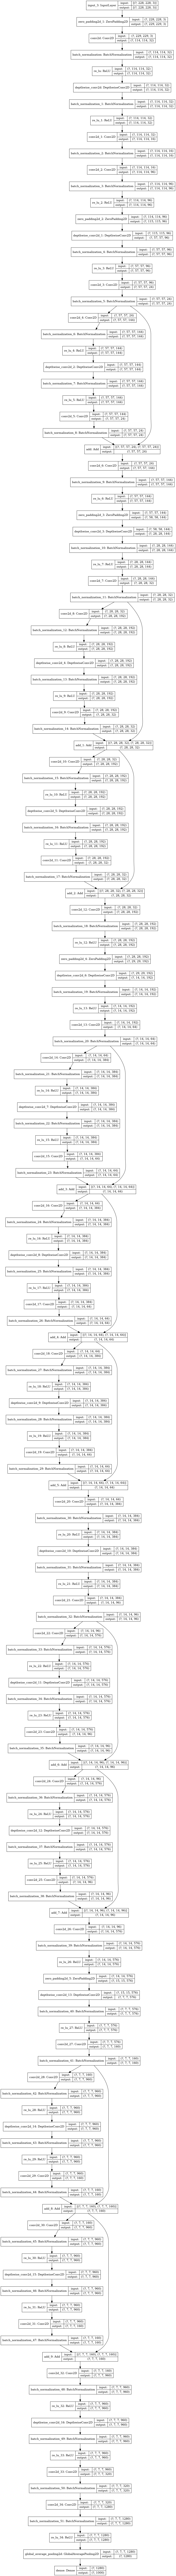

In [12]:
keras.utils.plot_model(entire_model, show_shapes=True)